In [1]:
import torch
DATA = 'Fashion'
prefix = 'fashion_dnn_kl_d_'
traing = True
epochs = 400
batch_size = 64
leaks_loss = 'KL_D'
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Mounted at /content/gdrive


In [3]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=9a1f8b5a798bf73daad31150a705af419f6936e008f0be3f1e24a3df784f15c6
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


##Fetching the dataset and preparing train, validation and test data loaders

In [5]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))


60000 7000 3000 10000


##Visualising the data

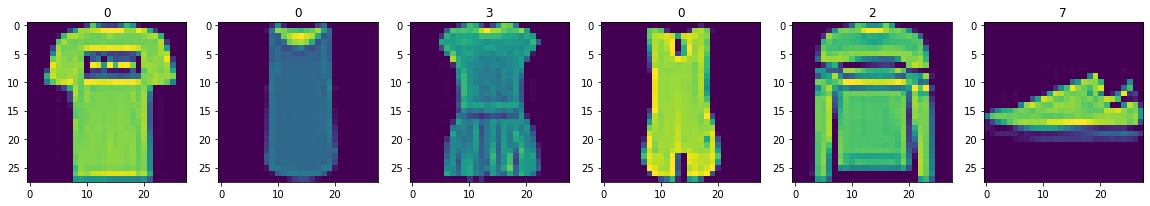

In [6]:
plot_samples(trainSet, None)

In [7]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(1, 6, 3, 1, 1), #28
            nn.BatchNorm2d(6),
            BinaryRelu(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, 0), #10
            nn.ReLU(),
            nn.MaxPool2d(2), #5
            nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(25 * 16, 120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )

##Defining model object, loss function and optimiser

In [8]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [9]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(1,2)

Saving the model state dictionary for Epoch: 1 with Validation loss: 0.56807858 and Accuracy: 76.73%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.49366710 and Accuracy: 80.34%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.43138990 and Accuracy: 83.66%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.42243981 and Accuracy: 83.87%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.39402968 and Accuracy: 84.76%
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.38889137 and Accuracy: 85.04%
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.37511569 and Accuracy: 85.77%
Saving the model state dictionary for Epoch: 8 with Validation loss: 0.36648953 and Accuracy: 86.26%
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.36300722 and Accuracy: 86.06%
Saving the model state dictionary for Epoch: 11 with Validation loss: 0.36091745 and Accur

In [10]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.8877, device='cuda:0')


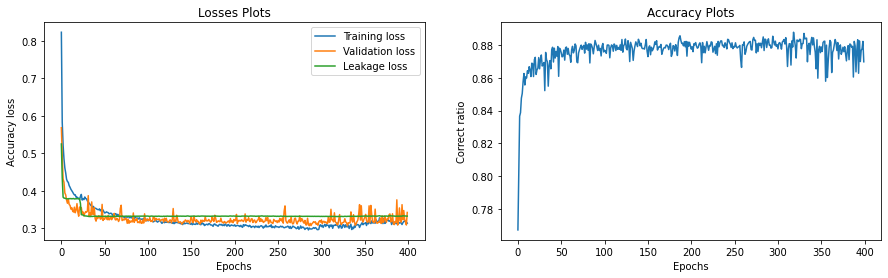

In [11]:
plot_losses()


Test accuracy: 0.8906666666666667


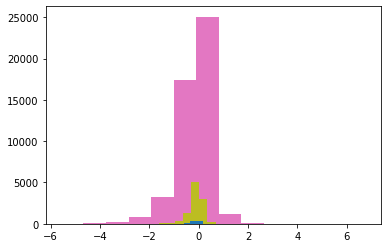

In [12]:
test_model()

##Measuring Privacy Preserving

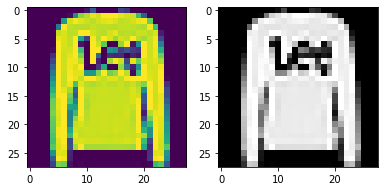

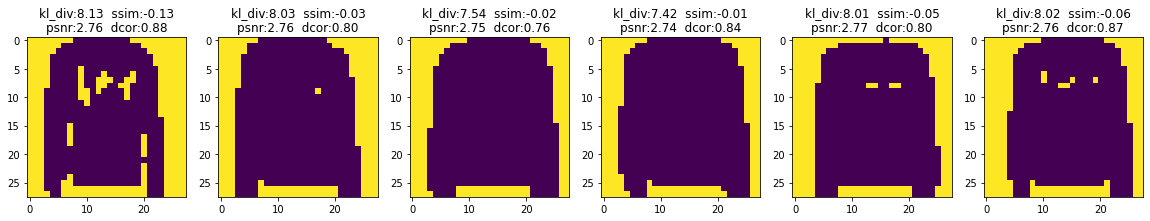

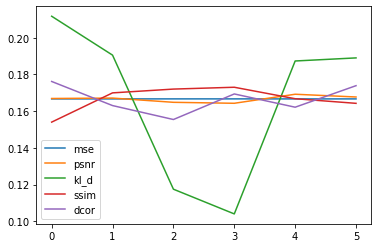

In [13]:
plot_measure(measure_image(testSet[1][0]))


tensor(5.7994, device='cuda:0') 0.9057849099541536 tensor(0.1319, device='cuda:0')


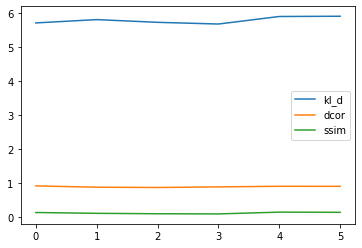

In [14]:
plot_measures(measure_images())